Machine learning modeling is covered in this project, to predict if an employee is likely to leave the company and to identify importance features influencing employee attrition.
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

(*Note: data exploration was completed in a previous notebook **EDA - IBM HR Analytics***)

# The Analysis

## Import & explore

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
#from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
hr_df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Preprocessing data

In [7]:
df = hr_df.copy()

### Features selection

In [8]:
# drop irrelevant/constant features
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1, inplace = True)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


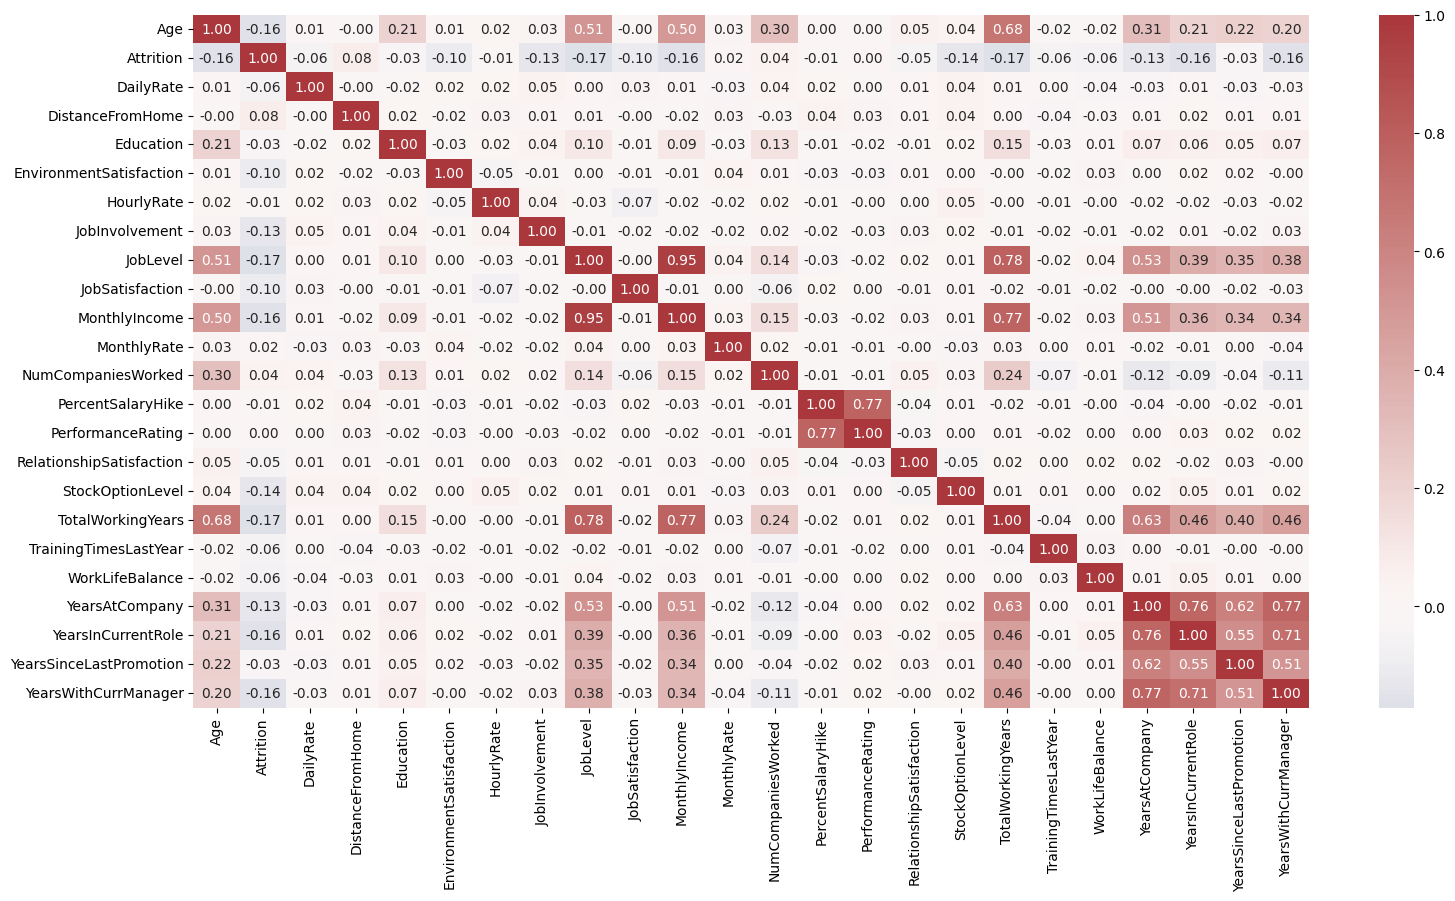

In [9]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
corr = df.corr(numeric_only = True)

plt.figure(figsize = (18, 9))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'vlag', center = 0);

In [10]:
corr['Attrition'].sort_values(key = abs, ascending = False)

Attrition                   1.000000
TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
MonthlyRate                 0.015170
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
Name: Attrition, dtype: float64

In [11]:
# potential low correlation
X = df[['PercentSalaryHike', 'HourlyRate', 'DailyRate', 'MonthlyRate', 'PerformanceRating']]
y = df['Attrition']

mi = mutual_info_classif(X, y)
print(dict(zip(X.columns, mi)))

{'PercentSalaryHike': 0.0, 'HourlyRate': 0.0, 'DailyRate': 0.011722793941156828, 'MonthlyRate': 0.0, 'PerformanceRating': 0.004319684778752997}


In [12]:
# performance rating vs attrition
ct = pd.crosstab(df['PerformanceRating'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f'Chi-square p-value for attrition and performance rating: {p:.4f}')

Chi-square p-value for attrition and performance rating: 0.9901


In [13]:
# continuous features vs attrition
feature = ['PercentSalaryHike', 'HourlyRate', 'DailyRate', 'MonthlyRate']

X = sm.add_constant(df[feature])  
y = df['Attrition']

model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.439909
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1465
Method:                           MLE   Df Model:                            4
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                0.004044
Time:                        04:38:36   Log-Likelihood:                -646.67
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                    0.2625
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2405      0.431     -2.876      0.004      -2.086      -0.395
PercentS

In [14]:
for col in feature:
    corr, p_value = pointbiserialr(df['Attrition'], df[col])
    print(f'Point biserial correlation for attrition vs {col}: {corr}, p-value: {p_value}') 

Point biserial correlation for attrition vs PercentSalaryHike: -0.013478202057439125, p-value: 0.605612823889375
Point biserial correlation for attrition vs HourlyRate: -0.006845549572139842, p-value: 0.7931347689944284
Point biserial correlation for attrition vs DailyRate: -0.05665199186762929, p-value: 0.029858160660264813
Point biserial correlation for attrition vs MonthlyRate: 0.015170212530471468, p-value: 0.5611235982242986


In [15]:
# drop low correlation features
df.drop(['PercentSalaryHike', 'HourlyRate', 'PerformanceRating'], axis = 1, inplace = True)

### Encoding

In [16]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
binary_cols

['Gender', 'OverTime']

In [17]:
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df['BusinessTravel'] = df['BusinessTravel'].astype('category').cat.set_categories(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']).cat.codes

df_enc = pd.get_dummies(df, drop_first = False)

df_enc.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,0,3,2,4,5993,19479,8,1,1,0,8,0,1,6,4,0,5,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,2,279,8,1,3,1,2,2,2,5130,24907,1,0,4,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1,1373,2,2,4,1,2,1,3,2090,2396,6,1,2,0,7,3,3,0,0,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,2,1392,3,4,4,0,3,1,3,2909,23159,1,1,3,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,1,591,2,1,1,1,3,1,2,3468,16632,9,0,4,1,6,3,3,2,2,2,2,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


## Modeling

In [18]:
X = df_enc.drop(['Attrition'], axis = 1)
X.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,3,2,4,5993,19479,8,1,1,0,8,0,1,6,4,0,5,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,2,279,8,1,3,1,2,2,2,5130,24907,1,0,4,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,4,1,2,1,3,2090,2396,6,1,2,0,7,3,3,0,0,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,2,1392,3,4,4,0,3,1,3,2909,23159,1,1,3,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,1,591,2,1,1,1,3,1,2,3468,16632,9,0,4,1,6,3,3,2,2,2,2,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [19]:
y = df_enc['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### Logistic Regression

In [20]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.4463504 , -0.16239918,  0.74252653, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.32236521,  1.71733935, -1.2977746 , ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.008343  , -0.16239918,  1.41436324, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -0.16239918, -1.60518328, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.32236521,  1.71733935,  0.54667746, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.32016256, -0.16239918, -0.43256792, ..., -0.53487311,
         1.08823234, -0.68556546]])

In [21]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = (
    train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)) # stratify for unbalanced class

In [22]:
lr = LogisticRegression(random_state = 42, max_iter = 5000, class_weight = 'balanced')
lr.fit(X_train_lr, y_train_lr)

train_score = lr.score(X_train_lr, y_train_lr)
y_pred_train = lr.predict(X_train_lr)

print('Classification Report (Training set):\n', classification_report(y_train_lr, y_pred_train))
print('AUC (Training set):', roc_auc_score(y_train_lr, y_pred_train))

Classification Report (Training set):
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       863
           1       0.43      0.81      0.56       166

    accuracy                           0.80      1029
   macro avg       0.69      0.80      0.71      1029
weighted avg       0.87      0.80      0.82      1029

AUC (Training set): 0.8029185106590906


### Tree-based

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [24]:
def train_results(model_name:str, model_object, metric:str):
    '''
    Returns model metrics with the best mean 'metric' score across all validation folds.  

    Arguments:
        model_name (string): give model a name in the output table
        model_object: the fitted GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
    '''

    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    cv_results = pd.DataFrame(model_object.cv_results_)

    # filter df with the max(metric) score
    best_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_results.mean_test_roc_auc
    f1 = best_results.mean_test_f1
    recall = best_results.mean_test_recall
    precision = best_results.mean_test_precision
    accuracy = best_results.mean_test_accuracy
  
    # create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc],
                        })
  
    return table

In [25]:
# decision tree
tree = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')

cv_params = {'max_depth': [3, 5, 7],
             'min_samples_leaf': [5, 10],
             'min_samples_split': [5, 10],
             'criterion': ['gini'],
             'max_features': ['sqrt']
             }

scores = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring = scores, cv = 4, refit = 'recall')
tree1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7],
                         'max_features': ['sqrt'], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10]},
             refit='recall',
             scoring={'f1', 'roc_auc', 'precision', 'recall', 'accuracy'})

In [26]:
tree1_cv_results = train_results('decision tree cv', tree1, 'auc')
tree1.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [27]:
# random forest
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

cv_params = {'max_depth': [5, 10], 
             'max_features': ['sqrt'],
             'min_samples_leaf': [5, 10],
             'min_samples_split': [5, 10],
             'n_estimators': [100],
             'bootstrap': [True], 
             'criterion': ['gini']
             }  

scores = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring = scores, cv = 4, refit = 'recall')
rf1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10], 'n_estimators': [100]},
             refit='recall',
             scoring={'f1', 'roc_auc', 'precision', 'recall', 'accuracy'})

In [28]:
rf1_cv_results = train_results('random forest cv', rf1, 'auc')
rf1.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 100}

In [29]:
# XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 42, 
                    use_label_encoder = False, eval_metric = 'logloss', scale_pos_weight = scale_pos_weight)

cv_params = {'max_depth': [3, 5], 
             'learning_rate': [0.05, 0.1], 
             'n_estimators': [100], 
             'subsample': [0.8], 
             'colsample_bytree': [0.8]
             }  

scores = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb1 = GridSearchCV(xgb, cv_params, scoring = scores, cv = 4, refit = 'recall')
xgb1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100], 'subsample': [0.8]},
             refit='recall',
             scoring={'f1', 'roc_auc', 'precision', 'recall', 'accuracy'})

In [30]:
xgb1_cv_results = train_results('xgboost cv', xgb1, 'auc')
xgb1.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [31]:
print('Tree-based results (Training set):')
print(tree1_cv_results)
print(rf1_cv_results)
print(xgb1_cv_results)

Tree-based results (Training set):
              model  precision    recall       F1  accuracy      auc
0  decision tree cv   0.287158  0.656069  0.39871  0.676368  0.70136
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.632942  0.398519  0.476151  0.863945  0.808153
        model  precision   recall        F1  accuracy       auc
0  xgboost cv   0.513141  0.59698  0.550784  0.843544  0.817697


### Evaluation results across models (Training set)

| Model                   | Precision | Recall    | F1 Score  | Accuracy | AUC       |
| ----------------------- | --------- | --------- | --------- | -------- | --------- |
| **Logistic Regression** | 0.430     | **0.810** | **0.560** | 0.800    | 0.803     |
| **Decision Tree**       | 0.287     | 0.656     | 0.399     | 0.676    | 0.701     |
| **Random Forest**       | 0.633     | 0.399     | 0.476     | 0.864    | 0.808     |
| **XGBoost**             | 0.513     | 0.597     | 0.551     | 0.844    | **0.818** |


- Logistic regression performs the best in identifying attrition, with the highest recall of 0.810 and F1 score of 0.560
- Decision Tree is underperforming across the board
- Random Forest is excellent on accuracy and AUC, but recall is low which suggests missing too many true attrition cases
- XGBoost has a good balanced performance overall, with higher accuracy of 0.844 and AUC of 0.818

In the context of employee attrition prediction, two models are chosen to evaluate on the test set: **Logistic Regression** and **XGBoost**.

## Evaluation

### Logistic Regression

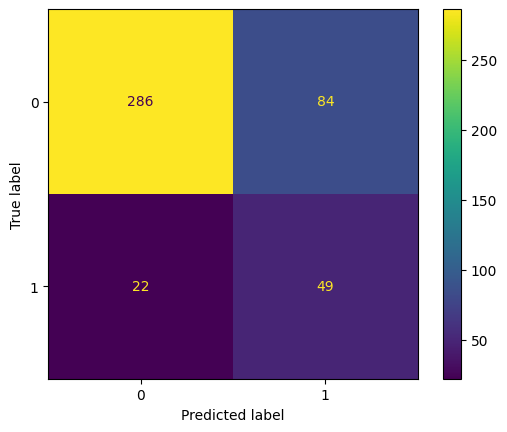

Classification Report (Test data):
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       370
           1       0.37      0.69      0.48        71

    accuracy                           0.76       441
   macro avg       0.65      0.73      0.66       441
weighted avg       0.84      0.76      0.79       441

AUC (Test data): 0.7315569090216978


In [32]:
test_score = lr.score(X_test_lr, y_test_lr)
y_pred_test = lr.predict(X_test_lr)

cm = confusion_matrix(y_test_lr, y_pred_test, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()
plt.show()

print('Classification Report (Test data):\n', classification_report(y_test_lr, y_pred_test))
print('AUC (Test data):', roc_auc_score(y_test_lr, y_pred_test))

In [33]:
# identify top 10 features coefficient
coef = lr.coef_[0]

lr_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef, 'Odds_Ratio': np.exp(coef)})
lr_coef = lr_coef.reindex(lr_coef['Coefficient'].abs().sort_values(ascending = False).index)

lr_coef.head(10)

,Feature,Coefficient,Odds_Ratio
8,JobLevel,0.815162,2.259542
13,OverTime,0.778525,2.178258
21,YearsSinceLastPromotion,0.613366,1.846636
16,TotalWorkingYears,-0.553353,0.575019
37,JobRole_Research Director,-0.526331,0.590768
12,NumCompaniesWorked,0.502112,1.652207
40,JobRole_Sales Representative,0.498567,1.646360
1,BusinessTravel,0.468731,1.597966
33,JobRole_Human Resources,0.465367,1.592599
10,MonthlyIncome,-0.457888,0.632618


### XGBoost

XGBoost results (Test set):
      model  precision    recall        f1  accuracy       AUC
0  XGBoost    0.39759  0.464789  0.428571  0.800454  0.664827 



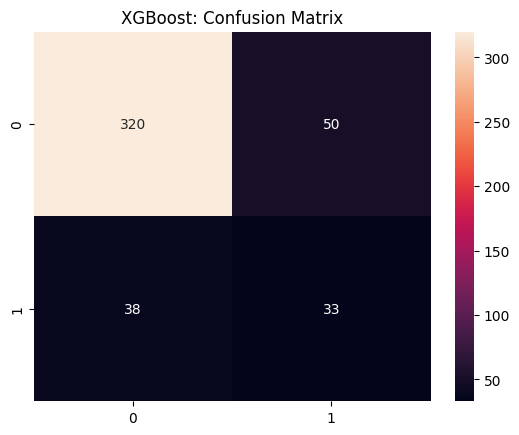

In [34]:
preds = xgb1.best_estimator_.predict(X_test)

auc = roc_auc_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

table = pd.DataFrame({'model': 'XGBoost', 'precision': [precision], 'recall': [recall], 'f1': [f1], 'accuracy': [accuracy], 'AUC': [auc]})

print('XGBoost results (Test set):\n', table, '\n')

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title(f'XGBoost: Confusion Matrix')
plt.show()

In [35]:
# identify features importance
feat_impt = xgb1.best_estimator_.feature_importances_

inx = np.argpartition(xgb1.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[inx]

feat_impt = feat_impt[inx]
importance_df = pd.DataFrame({'Feature': feat, 'Importance': feat_impt}).sort_values(by = 'Importance', ascending = False)

importance_df

,Feature,Importance
9,Department_Sales,0.069235
3,OverTime,0.043160
7,YearsWithCurrManager,0.042519
4,StockOptionLevel,0.040087
6,JobRole_Manager,0.039052
8,YearsAtCompany,0.034845
5,JobRole_Sales Executive,0.032974
2,MonthlyIncome,0.032269
1,JobRole_Sales Representative,0.031888
0,JobLevel,0.029145


# Summary

## Models comparison

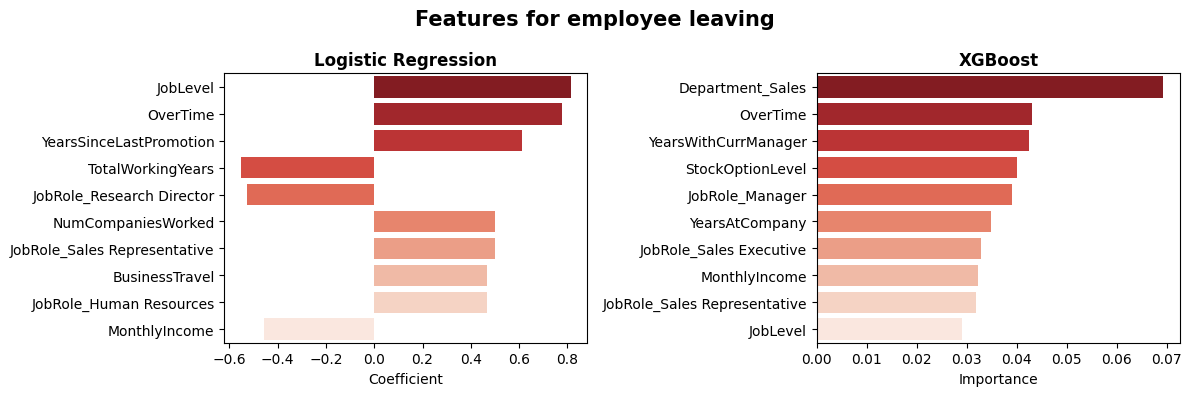

In [36]:
fig = plt.figure(figsize = (12, 4))
ax1 = plt.subplot2grid((1, 2),(0, 0))
ax2 = plt.subplot2grid((1, 2),(0, 1))

# logistic regression
sns.barplot(data = lr_coef.head(10), x = 'Coefficient', y = 'Feature', palette = 'Reds_r', ax = ax1)
ax1.set_title('Logistic Regression', fontweight = 'bold')
ax1.set_ylabel('')

# xgboost
sns.barplot(data = importance_df, x = 'Importance', y = 'Feature', palette = 'Reds_r', ax = ax2)
ax2.set_title('XGBoost', fontweight = 'bold')
ax2.set_ylabel('')


plt.suptitle('Features for employee leaving', fontsize = 15, fontweight = 'bold')
plt.tight_layout()
plt.show()

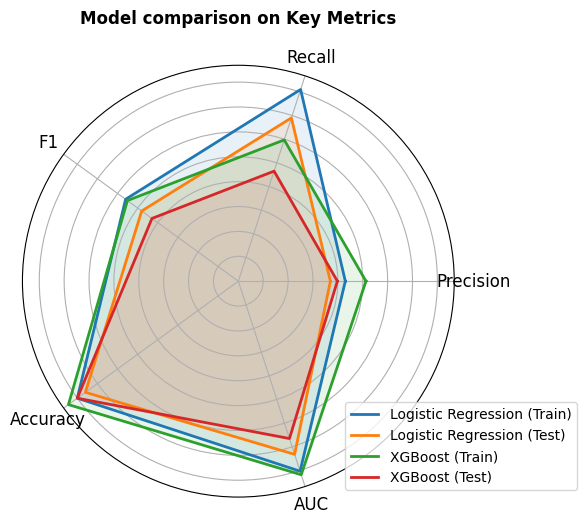

In [39]:
labels = ['Precision', 'Recall', 'F1', 'Accuracy', 'AUC']

models = {
    'Logistic Regression (Train)': [0.43, 0.81, 0.56, 0.8, 0.803],
    'Logistic Regression (Test)': [0.37, 0.69, 0.48, 0.76, 0.732],
    'XGBoost (Train)': [0.513, 0.597, 0.551, 0.844, 0.818],
    'XGBoost (Test)': [0.398, 0.465, 0.429, 0.8, 0.665]
}

# radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint = False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))

# plot each model
for name, stats in models.items():
    stats += stats[:1]
    ax.plot(angles, stats, label = name, linewidth = 2)
    ax.fill(angles, stats, alpha = 0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize = 12)
ax.set_yticklabels([])
ax.set_title('Model comparison on Key Metrics', fontweight = 'bold', pad = 30)
ax.legend(loc = 'lower right', bbox_to_anchor = (1.3, 0))


plt.tight_layout()
plt.savefig('model_metrics_comparison.png', dpi = 300, bbox_inches = 'tight')
plt.show()

- Logistic Regression
    - High Recall on both train (0.81) and test (0.69); excellent in catching most of the attrition cases, i.e. minimizing false negatives
    - Moderate drop in F1 and AUC from train to test is acceptable; suggesting reasonable generalization

- XGBoost
    - AUC is higher on training (0.818), but drops to 0.665 on test; indicating potential overfitting
    - F1 score also dips from 0.551 to 0.429

Next, further actions, e.g. hyperparameter tuning, etc. required to improve generalization of the models especially with XGBoost.